In [30]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

%matplotlib inline

# Introduction to Peylin flux data

Open flux data files and try some analyis.

In [31]:
file_dir = './../data/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc'
Rayner = xr.open_dataset(file_dir)

In [32]:
Rayner

<xarray.Dataset>
Dimensions:           (latitude: 180, longitude: 360, time: 252)
Coordinates:
  * longitude         (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude          (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time              (time) object 1992-01-16 00:00:00 ... 2012-12-16 00:00:00
Data variables:
    Terrestrial_flux  (time, latitude, longitude) float32 ...
    ocean             (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Fri Apr  5 01:24:44 2019: ncrename -a .FillValue,_FillValue...
    NCO:          "4.6.3"

In [33]:
RT = Rayner.Terrestrial_flux.sel(time='1992-06-16').values[0]
RO = Rayner.ocean.sel(time='1992-06-16').values[0]

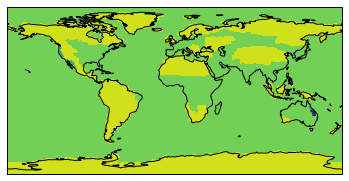

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(Rayner.longitude, Rayner.latitude, RT)

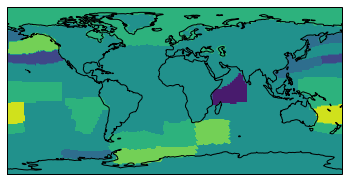

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(Rayner.longitude, Rayner.latitude, RO)

In [36]:
file_dir = './../data/fco2_CAMS-V17-1-2018_June2018-ext3_1979-2017_monthlymean_XYT.nc'
CAMS_V17 = xr.open_dataset(file_dir)

In [37]:
CAMS_V17

<xarray.Dataset>
Dimensions:           (latitude: 180, longitude: 360, time: 468)
Coordinates:
  * longitude         (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude          (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time              (time) object 1979-01-16 00:00:00 ... 2017-12-16 00:00:00
Data variables:
    fossil            (time, latitude, longitude) float32 ...
    Terrestrial_flux  (time, latitude, longitude) float32 ...
    Ocean_flux        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Thu Apr  4 23:44:41 2019: ncrename -a .FillValue,_FillValue...
    NCO:          "4.6.3"

In [38]:
CAMS_V17.Terrestrial_flux

<xarray.DataArray 'Terrestrial_flux' (time: 468, latitude: 180, longitude: 360)>
[30326400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 1979-01-16 00:00:00 ... 2017-12-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

In [39]:
CAMS_V17.Terrestrial_flux.sel(time='2017-11-16')

<xarray.DataArray 'Terrestrial_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[6.597166e-09, 6.602390e-09, ..., 6.933514e-09, 6.597166e-09],
        [4.039088e-08, 4.044185e-08, ..., 4.367262e-08, 4.039088e-08],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-11-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

In [40]:
land = CAMS_V17.Terrestrial_flux.sel(time='2017-12-16')
land

<xarray.DataArray 'Terrestrial_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[5.332498e-09, 5.336406e-09, ..., 5.449448e-09, 5.332498e-09],
        [2.431741e-08, 2.435555e-08, ..., 2.545849e-08, 2.431741e-08],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-12-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

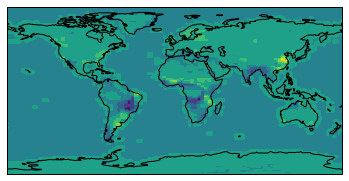

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(land.longitude, land.latitude, land.values[0])

In [42]:
ocean = CAMS_V17.Ocean_flux.sel(time='2017-11-16')
ocean

<xarray.DataArray 'Ocean_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [-0.049694, -0.049657, ..., -0.049679, -0.049694],
        [-0.051127, -0.051123, ..., -0.051125, -0.051127]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-11-16 00:00:00
Attributes:
    title:    Ocean_flux
    units:    gC/m2/year

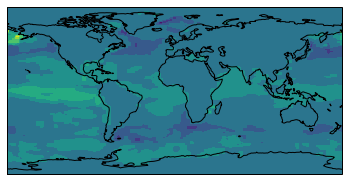

In [158]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(ocean.longitude, ocean.latitude, ocean.values[0])

In [44]:
fossil = CAMS_V17.fossil.sel(time='2015-01-16', method='nearest')
fossil

<xarray.DataArray 'fossil' (time: 1, latitude: 180, longitude: 360)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2015-01-16 00:00:00
Attributes:
    title:    fossil
    units:    gC/m2/year

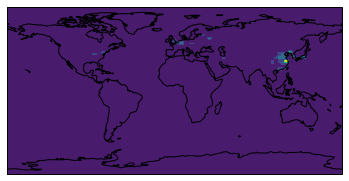

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(fossil.longitude, fossil.latitude, fossil.values[0])

# Introductory Gridbox analysis (area)

In [63]:
CAMS_V17.latitude

<xarray.DataArray 'latitude' (latitude: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  3

In [47]:
CAMS_V17.longitude

<xarray.DataArray 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5])
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

Function to find the area of one gridbox in metres squared.

In [48]:
import sys

In [49]:
sys.path.append('./../')
from Scripts import earth_area as ea

Example: Area between 20-21N and 20-21W.

In [50]:
ea.scalar_earth_area(20,21,20,21)

11581159925.416557

Example: Area between 0-1N and 0-1W.

In [51]:
ea.scalar_earth_area(0,1,0,1)/1000000

12363.683990261115

In [52]:
ea.scalar_earth_area(89,90,0,1)/1000000

107.89623558970828

Now we can get an array of gridbox areas with the function below.

In [53]:
grid = np.zeros((180,360))
for i in enumerate(range(-90,90)):
    grid[i[0],:] = ea.earth_area(i[1],i[1]+1,range(-180,180),range(-179,181))[0]

In [272]:
grid

array([[1.07896236e+08, 1.07896236e+08, 1.07896236e+08, ...,
        1.07896236e+08, 1.07896236e+08, 1.07896236e+08],
       [3.23655841e+08, 3.23655841e+08, 3.23655841e+08, ...,
        3.23655841e+08, 3.23655841e+08, 3.23655841e+08],
       [5.39316857e+08, 5.39316857e+08, 5.39316857e+08, ...,
        5.39316857e+08, 5.39316857e+08, 5.39316857e+08],
       ...,
       [5.39316857e+08, 5.39316857e+08, 5.39316857e+08, ...,
        5.39316857e+08, 5.39316857e+08, 5.39316857e+08],
       [3.23655841e+08, 3.23655841e+08, 3.23655841e+08, ...,
        3.23655841e+08, 3.23655841e+08, 3.23655841e+08],
       [1.07896236e+08, 1.07896236e+08, 1.07896236e+08, ...,
        1.07896236e+08, 1.07896236e+08, 1.07896236e+08]])

Now multiply the fluxes by the area in each gridbox and sum it up to get the net global sink (at one time point).

In [273]:
land_flux = CAMS_V17.Terrestrial_flux.sel(time='2017-12-16').values[0]
land_flux

array([[5.3324976e-09, 5.3364064e-09, 5.3637663e-09, ..., 6.2680985e-09,
        5.4494480e-09, 5.3324976e-09],
       [2.4317412e-08, 2.4355552e-08, 2.4622503e-08, ..., 3.3446028e-08,
        2.5458490e-08, 2.4317412e-08],
       [3.0211840e-08, 3.0259617e-08, 3.0594048e-08, ..., 3.7863785e-08,
        3.1168334e-08, 3.0211840e-08],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [274]:
total_sink = land_flux*grid
total_sink

array([[ 0.57535641,  0.57577817,  0.57873019, ...,  0.67630423,
         0.58797493,  0.57535641],
       [ 7.87047245,  7.88281673,  7.96921695, ..., 10.82500236,
         8.23978912,  7.87047245],
       [16.29375466, 16.31952155, 16.4998859 , ..., 20.42057751,
        16.80960776, 16.29375466],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Net global terrestrial sink Dec 2017, gC of Carbon (per year or in just that month?)

In [258]:
np.sum(total_sink)

5300820115999727.0

Net global terrestrial sink Dec 2017, gtC of Carbon (per year or in just that month?)

In [259]:
np.sum(total_sink)*1e-15

5.300820115999727

## Semihemispheres and their fluxes

In [95]:
lat = CAMS_V17.latitude
lon = CAMS_V17.longitude

In [212]:
agg_land = np.sum(land_flux,axis=1)

In [217]:
i = np.intersect1d(lat[lat>-23], lat[lat<23], return_indices=True)[2]
trop = agg_land[i]

In [218]:
south = agg_land[lat<-23]

In [219]:
north = agg_land[lat>23]

In [283]:
a=np.sum(trop)*np.sum(ea.earth_area(-23,23,range(-180,180),range(-179,181)))

In [311]:
b=np.sum(south)*np.sum(ea.earth_area(-90,-23,range(-180,180),range(-179,181)))

In [222]:
c=np.sum(north)*np.sum(ea.earth_area(23,90,range(-180,180),range(-179,181)))

In [286]:
(a+b+c)*1e-15

123133.69955243303

In [324]:
np.sum(land_flux*grid)

5300820115999727.0

In [329]:
np.sum(land_flux)*np.sum(grid)

4.51681599842168e+20

In [281]:
ea.earth_area(-23,23,range(-180,180),range(-179,181)).shape

(360, 1)

In [321]:
trop.shape

(46,)

In [331]:
np.min(land_flux)

-1165.6285

In [335]:
np.min(np.abs(land_flux))

0.0

In [336]:
t1=np.array([1,2,3])
t2=np.array([5,6,7])

In [337]:
t1*t2

array([ 5, 12, 21])

In [338]:
np.sum(t1*t2)

38

In [339]:
np.sum(t1)*np.sum(t2)

108

In [340]:
np.sum(t1)

6

In [341]:
np.sum(t2)

18

In [360]:
p=ea.earth_area_grid(np.arange(-90,90), np.arange(-180,180))

In [361]:
np.array_equal(p,grid)

False

In [354]:
ea.scalar_earth_area(0,1,-170.5,170.5)

4216016240679.041